In [141]:
# Import libraries
from openslide import OpenSlide, lowlevel 
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import numpy as np

import xml.etree.ElementTree as ET
import pickle


In [137]:
# Define the path for the slides & labels
slides_path = '/Users/gabriel.jimenez/Documents/project/data/slides/'
labels_path = '/Users/gabriel.jimenez/Documents/project/data/labels/'
infos_path = '/Users/gabriel.jimenez/Documents/project/data/info_slides/'

slide_name = 'A1702076.ndpi'

# Opening the slide image
slide = OpenSlide(slides_path+slide_name)

# Getting slide level dimentions
slide_levels = slide.level_dimensions

# Printing important information about the current slide
print("[INFO] The slide have ", len(slide_levels), " magnification levels:")
for i in range(len(slide_levels)):
    print("   Level ", i, " with dimensions (in pixels) : ", slide_levels[i])

# Chosing the magnification level
slide_dim_lvl = 0

# Getting the thumbnail for slide
thm = slide.read_region((0, 0), slide_dim_lvl, slide_levels[slide_dim_lvl])

[INFO] The slide have  9  magnification levels:
   Level  0  with dimensions (in pixels) :  (55552, 41216)
   Level  1  with dimensions (in pixels) :  (27776, 20608)
   Level  2  with dimensions (in pixels) :  (13888, 10304)
   Level  3  with dimensions (in pixels) :  (6944, 5152)
   Level  4  with dimensions (in pixels) :  (3472, 2576)
   Level  5  with dimensions (in pixels) :  (1736, 1288)
   Level  6  with dimensions (in pixels) :  (868, 644)
   Level  7  with dimensions (in pixels) :  (434, 322)
   Level  8  with dimensions (in pixels) :  (217, 161)


In [138]:
'''
This code works for pickle annotations
'''
with open((labels_path+'labels_'+slide_name.split('.')[0]+'.p'),'rb') as file:
    labels = pickle.Unpickler(file).load()
for obj,coordinates in labels:
    polygon_label = Polygon([(point[0],point[1]) for point in coordinates])

coords_region = list(polygon_label.bounds)
x,y = polygon_label.exterior.xy

coords = []
for obj, coordinates in labels:
    coords.append((coordinates[:, 0], coordinates[:, 1]))

print(coords)

[(array([2565.41944, 2619.91549, 2619.91549, 2638.08107, 2638.08107,
       2619.91549, 2619.91549, 2601.75014, 2601.75014, 2583.58479,
       2583.58479, 2619.91549, 2619.91549, 2565.41944, 2565.41944]), array([489.367783, 489.367783, 471.206129, 471.206129, 416.721106,
       416.721106, 398.559451, 398.559451, 416.721106, 416.721106,
       434.88279 , 434.88279 , 453.044444, 453.044444, 489.367783])), (array([7903.74517, 7903.74517, 7911.00693, ..., 7815.2132 , 7815.2132 ,
       7903.74517]), array([-636.65545 , -645.080864, -645.080864, ..., -618.493855,
       -636.655509, -636.65545 ])), (array([5308.39109, 5326.55668, 5326.55668, 5308.39109, 5308.39109]), array([-37.3205319, -37.3205319, -55.4821976, -55.4821976, -37.3205319])), (array([1094.02406, 1094.02406, 1112.18941, 1112.18941, 1094.02406,
       1094.02406, 1075.85859, 1075.85859, 1094.02406]), array([-473.2005  , -491.362184, -491.362184, -527.685523, -527.685523,
       -509.523869, -509.523869, -473.2005  , -473.2005

In [139]:
def mtr_px_arr(array):
        """This function is the restriction of meter_to_pixel to the 4th type of input data (array)"""
        dims = slide_levels[slide_dim_lvl]
        magnification = slide_dim_lvl
        #performs the transformation into pixels
        center_pixels = (np.array(dims)/2).reshape((-1, 2)).astype(float)
        #print(center_pixels)
        array = center_pixels + (((array-center)*step)/2**magnification)
        array[:,1] = dims[1]-array[:,1] #flips coordinates on y axis
        
        return array.round().astype(int)

with open((infos_path+'infos_'+slide_name.split('.')[0]+'.p'),'rb') as file:
    infos = pickle.Unpickler(file).load()
    center = infos['Center']
    step = infos['Step']
    limits = infos['Limits']


(array([2565.41944, 2619.91549, 2619.91549, 2638.08107, 2638.08107,
       2619.91549, 2619.91549, 2601.75014, 2601.75014, 2583.58479,
       2583.58479, 2619.91549, 2619.91549, 2565.41944, 2565.41944]), array([489.367783, 489.367783, 471.206129, 471.206129, 416.721106,
       416.721106, 398.559451, 398.559451, 416.721106, 416.721106,
       434.88279 , 434.88279 , 453.044444, 453.044444, 489.367783]))


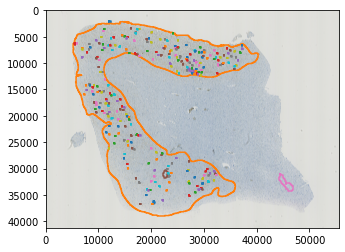

In [140]:
# Getting the size of the label
#size = (int(coords_region[2])+1, int(coords_region[3])+1)
#print(coords_region)

# Extracting the region of the label from the whole-slide-image
#region = slide.read_region((int(coords_region[0]), int(
#    coords_region[1])), slide_dim_lvl, (size[0], size[1]))
print((labels[0][1][:, 0], labels[0][1][:, 1]))
# Plotting the label along side the croped version of the whole slide image
plt.figure()
plt.imshow(thm)
for obj, coordinates in labels:
    #print(list(zip(coordinates[:, 0], coordinates[:, 1])))
    #print(coordinates)
    new_cords = mtr_px_arr(coordinates)
    plt.plot(new_cords[:, 0],new_cords[:, 1])
#plt.xlim((coords_region[0], coords_region[2]))
#plt.ylim((coords_region[3], coords_region[1]))

plt.show()


In [ ]:
'''
Working with XML
'''
